In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing, metrics
from sklearn.metrics import r2_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import warnings
from collections import Counter
from scipy.stats import pointbiserialr
import missingno as msno
warnings.filterwarnings('ignore')

In [2]:
# Load and display the dataset
df = pd.read_csv("Medicalpremium.csv")
print(df.head())

   Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0   45         0                      0               0                   0   
1   60         1                      0               0                   0   
2   36         1                      1               0                   0   
3   52         1                      1               0                   1   
4   38         0                      0               0                   1   

   Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
0     155      57               0                        0   
1     180      73               0                        0   
2     158      59               0                        0   
3     183      93               0                        0   
4     166      88               0                        0   

   NumberOfMajorSurgeries  PremiumPrice  
0                       0         25000  
1                       0         29000  
2                       1 

In [3]:
# Overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB
None


In [4]:
# Display basic statistical details
print(df.describe())

              Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.000000   
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.000000    1.000000               1.000000        0.000000   
max     66.000000    1.000000               1.000000        1.000000   

       AnyChronicDiseases      Height      Weight  KnownAllergies  \
count          986.000000  986.000000  986.000000      986.000000   
mean             0.180527  168.182556   76.950304        0.215010   
std              0.384821   10.098155   14.265096        0.411038   
min              0.000000  145.000000   51.000000        0.000000   
25%   

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


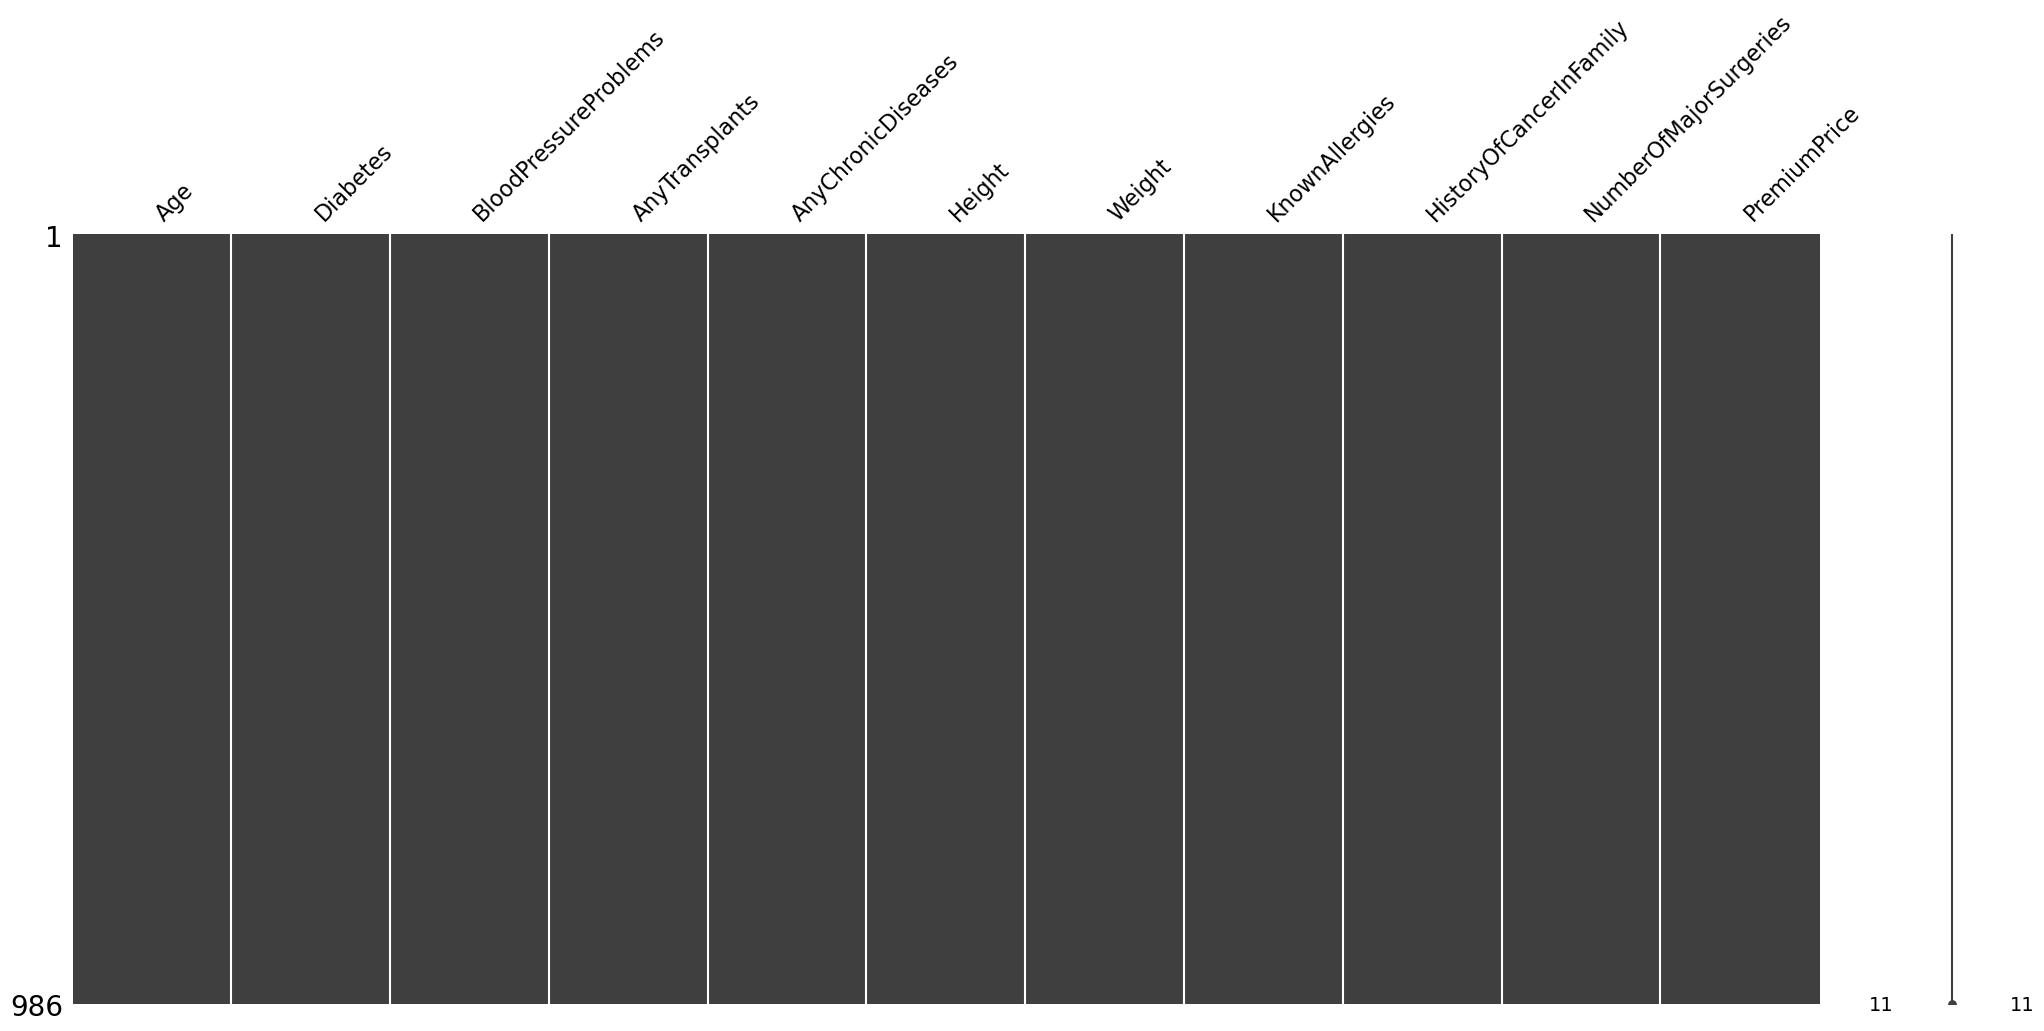

In [6]:
# Visualization of missing values
msno.matrix(df)
plt.show()

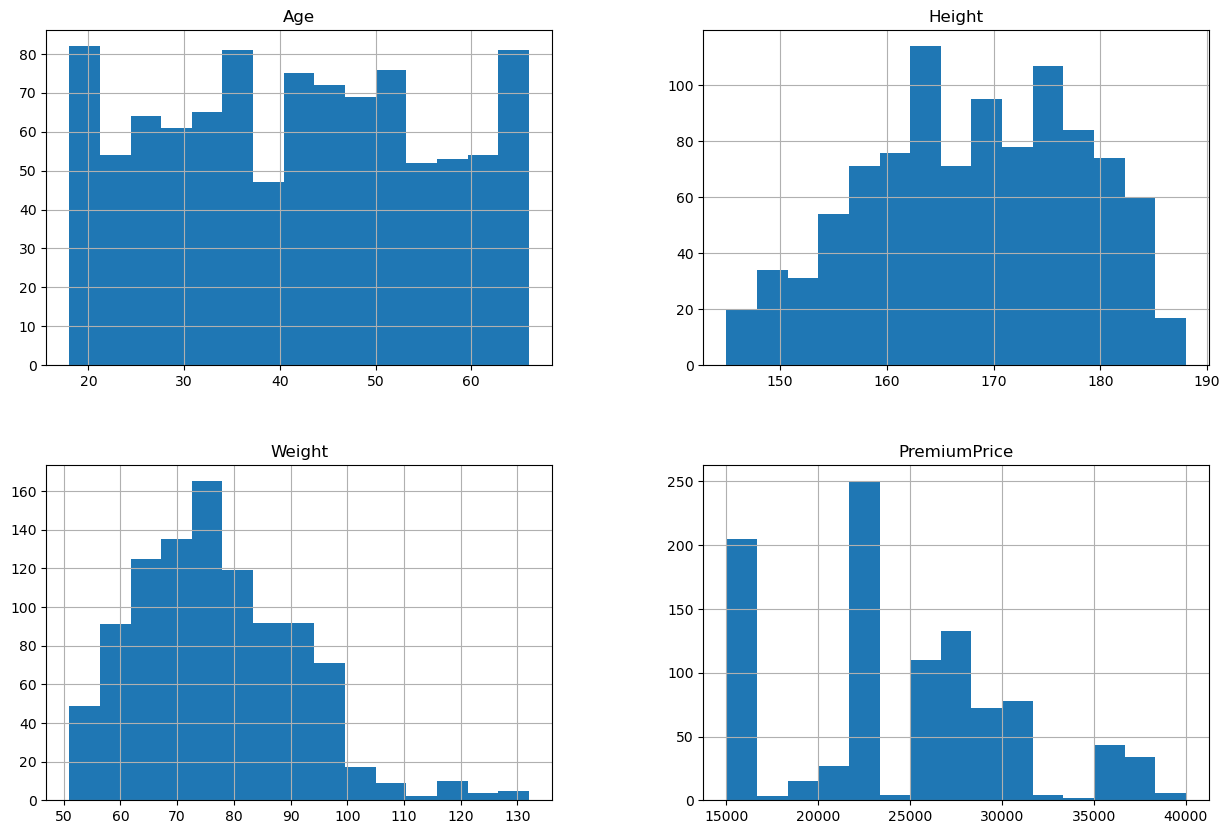

In [7]:
# Distribution of numerical features
numerical_features = ['Age', 'Height', 'Weight', 'PremiumPrice']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.show()

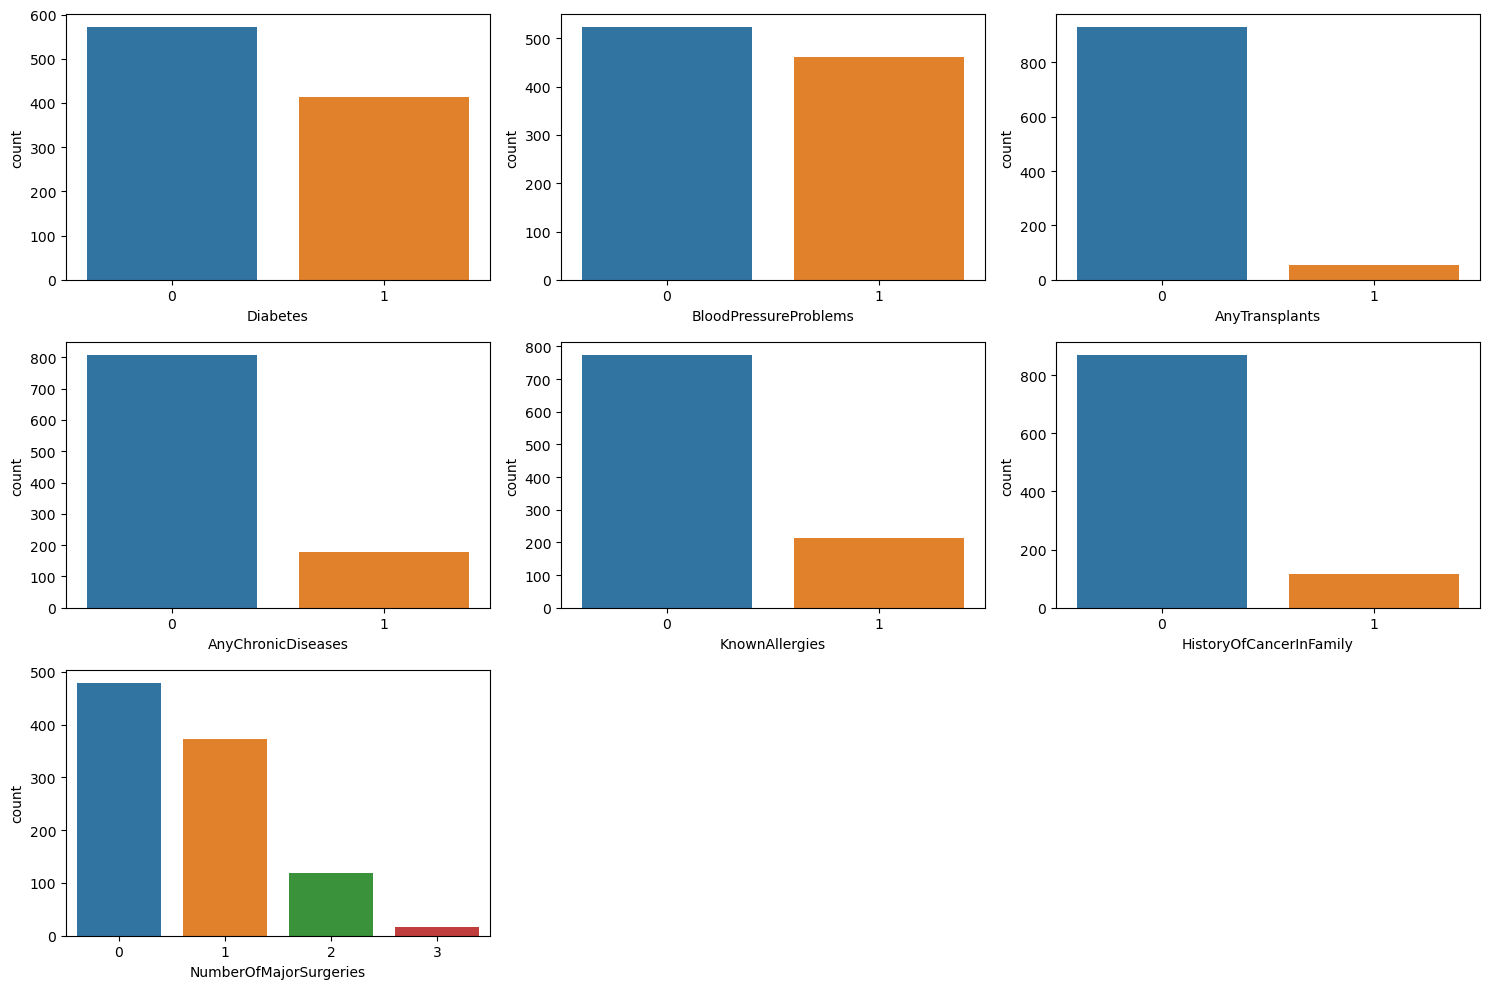

In [8]:
# Count plots for categorical features
categorical_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature)
plt.tight_layout()
plt.show()

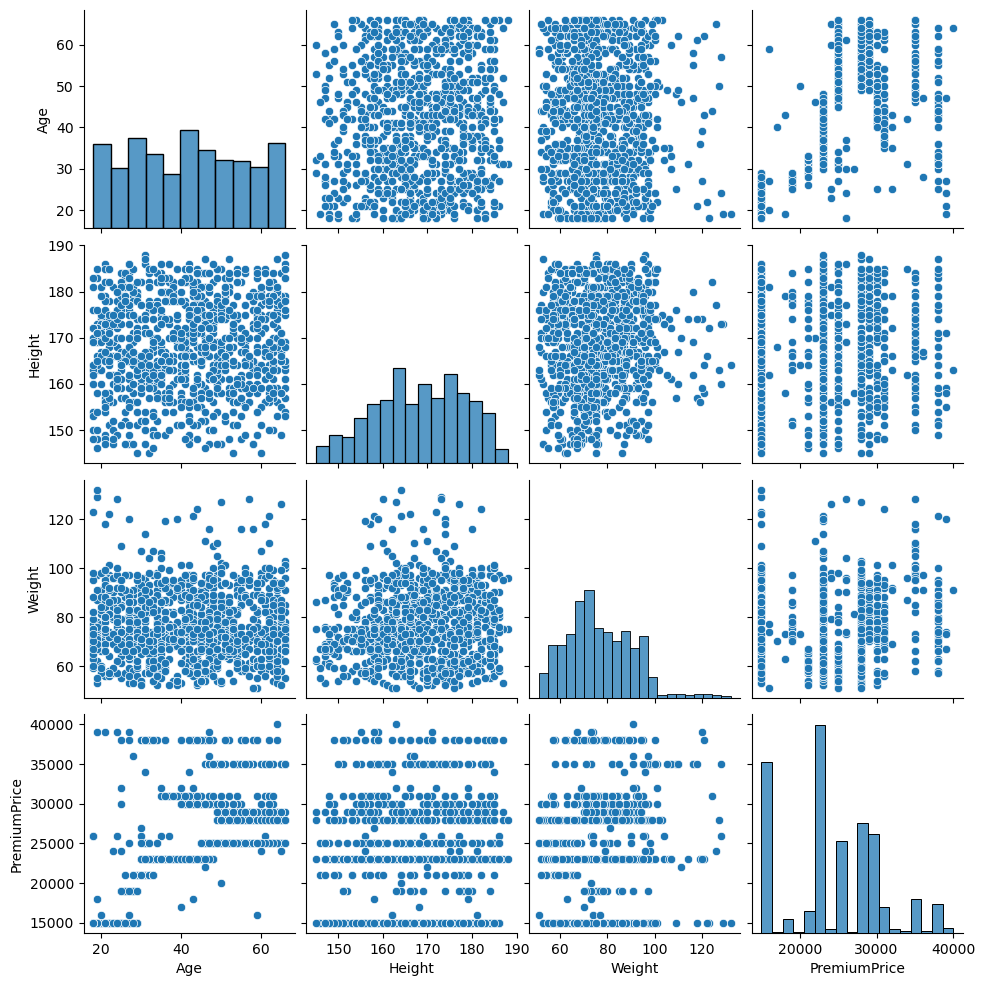

In [9]:
# Pair plot to see the relationship between numerical variables
sns.pairplot(df[numerical_features])
plt.show()

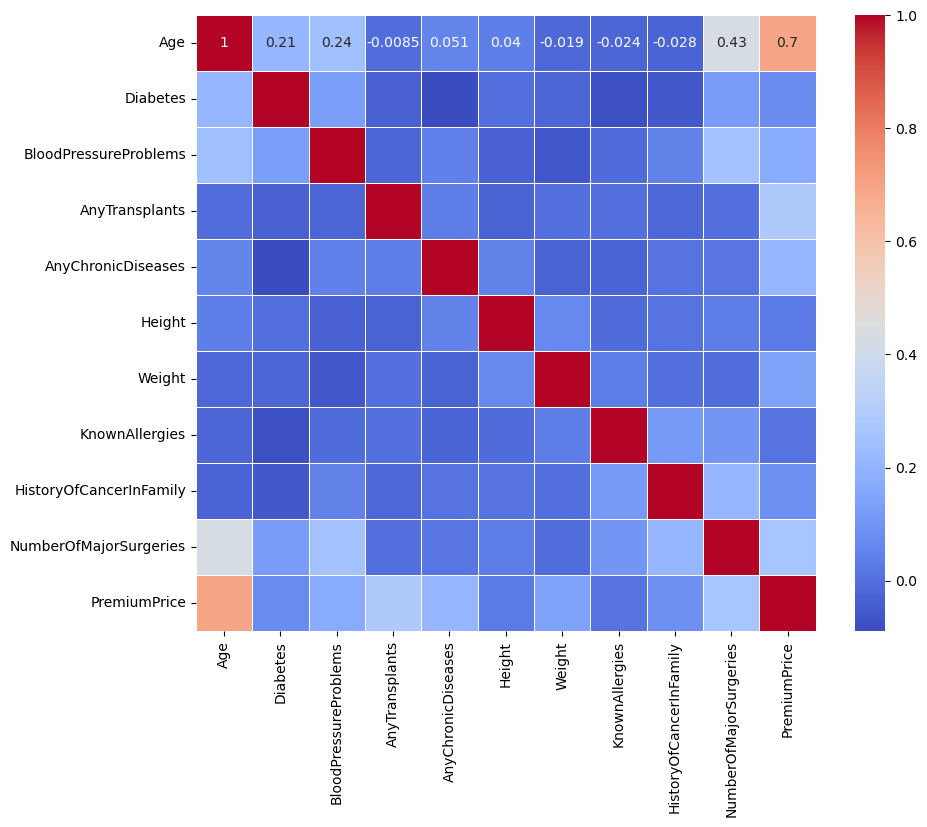

In [10]:
# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

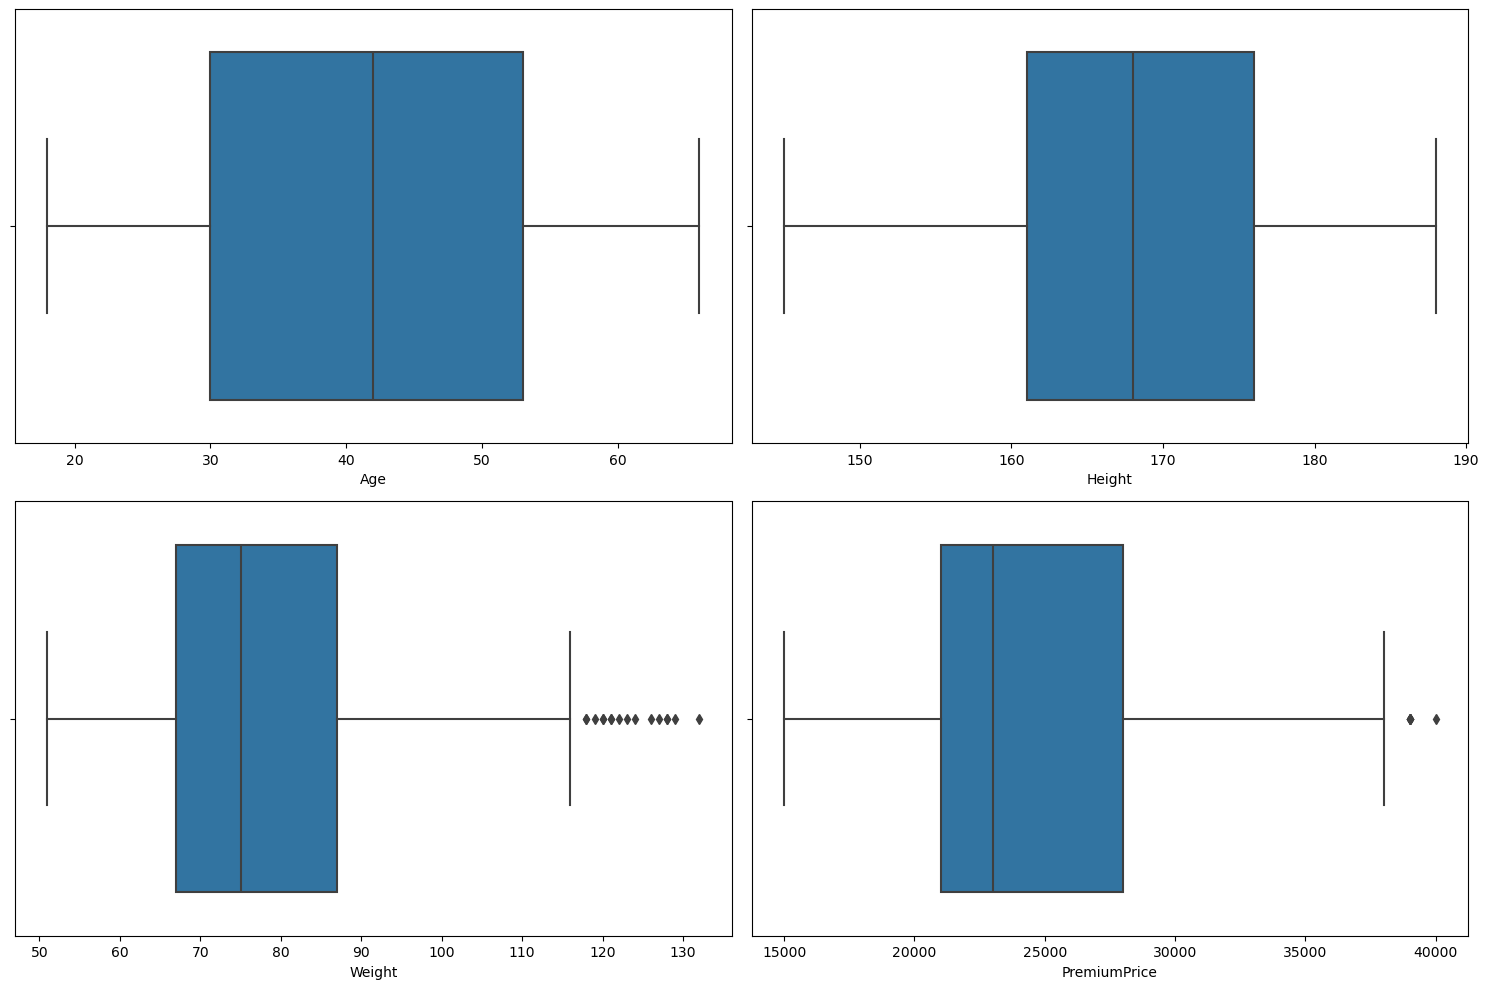

In [11]:
# Boxplots to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

In [12]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [13]:
# Remove outliers for numerical features
for col in numerical_features:
    df = remove_outliers(df, col)

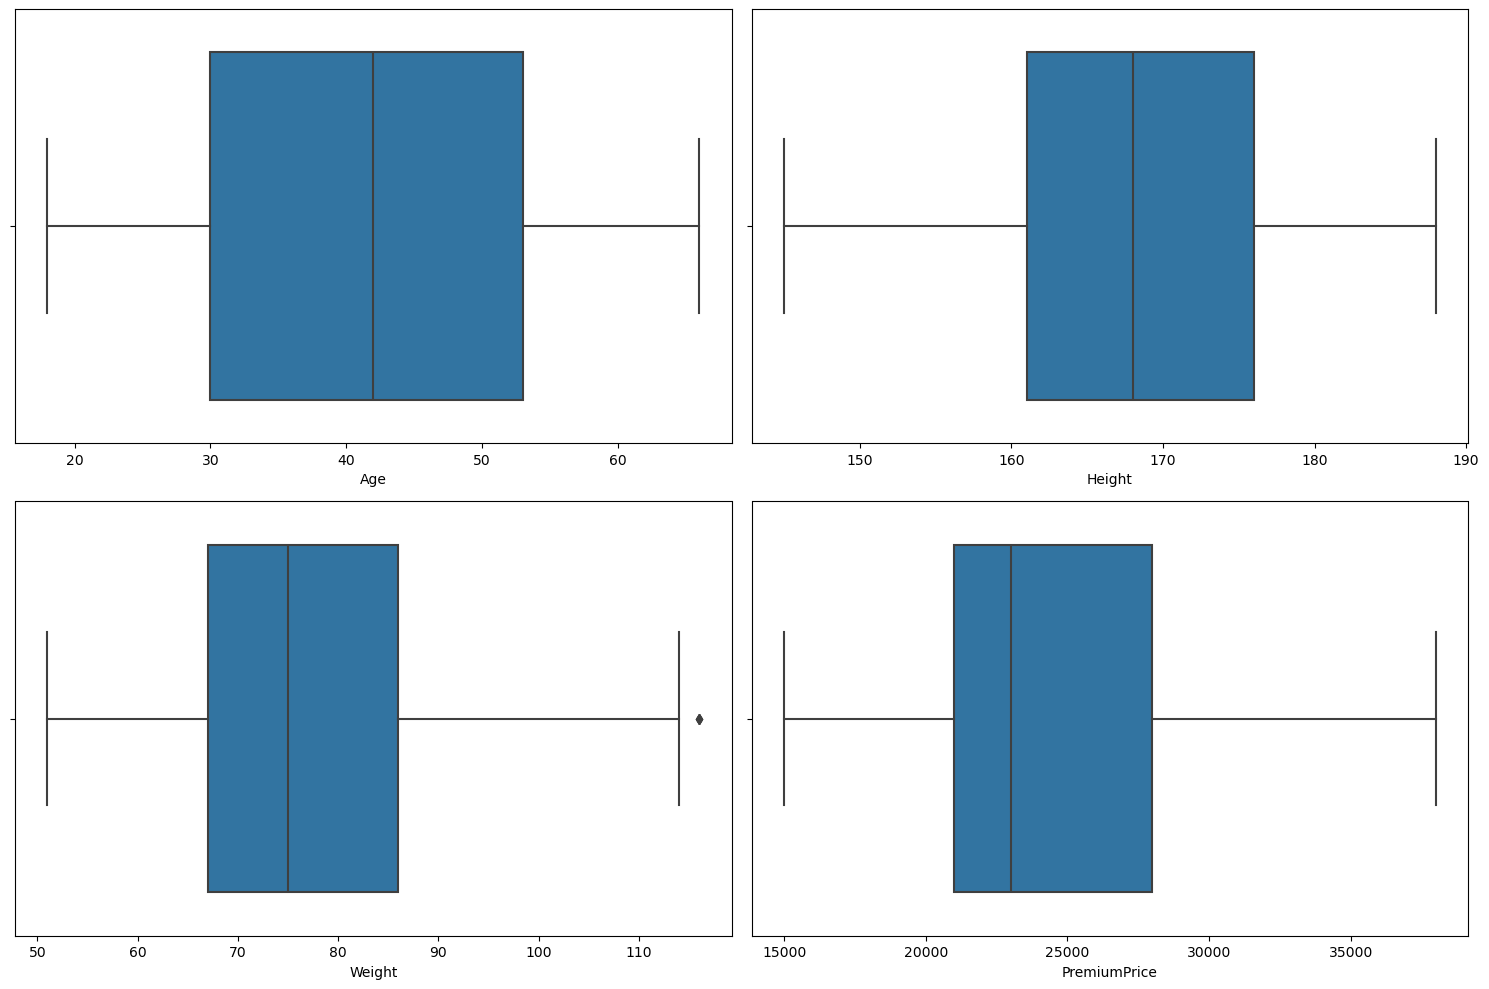

In [14]:
# Boxplots to check for remaining outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
plt.tight_layout()
plt.show()

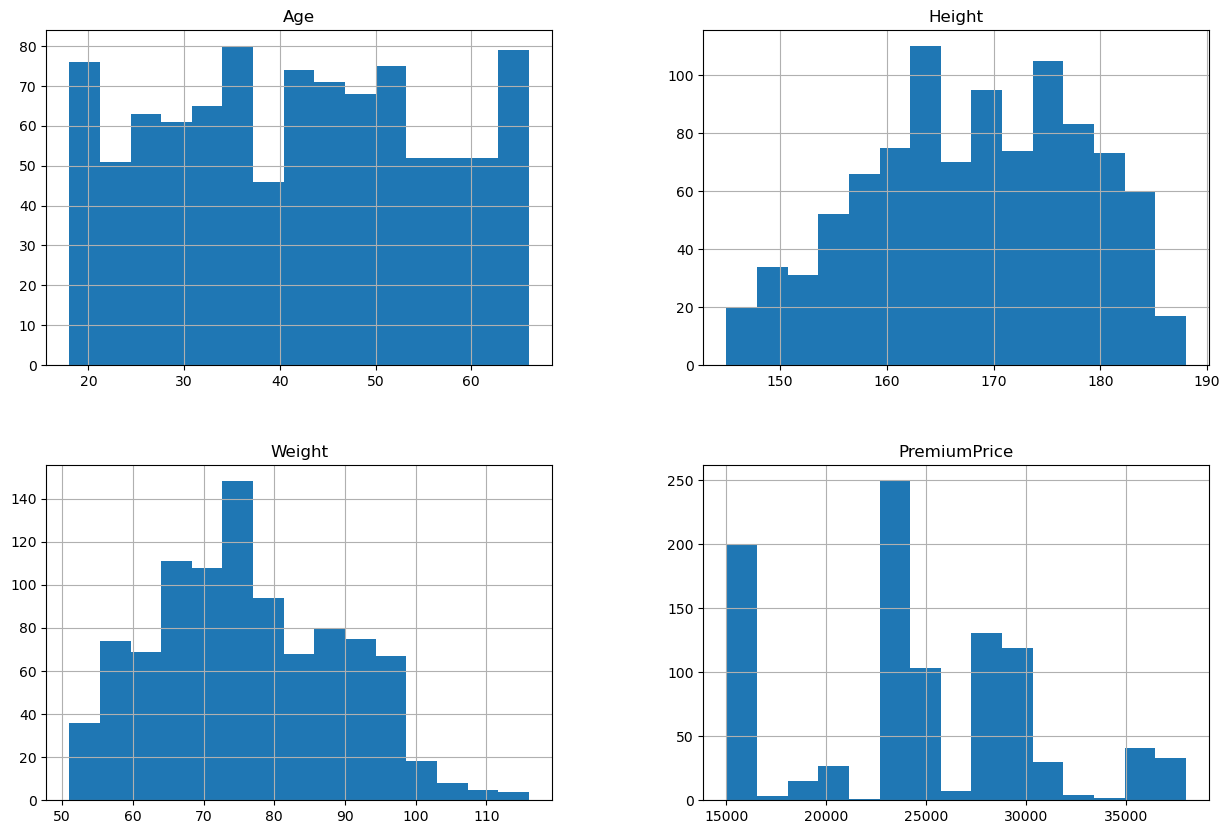

In [15]:
# Visualization after outlier removal
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.show()

In [16]:
# Check for and remove duplicates
df.drop_duplicates(inplace=True)

In [17]:
# Create BMI feature
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

In [18]:
# Categorize 'PremiumPrice' into high and low
df['PremiumCategory'] = pd.qcut(df['PremiumPrice'], q=2, labels=['Low', 'High'])

In [19]:
# Check class distribution
class_distribution = df['PremiumCategory'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 PremiumCategory
Low     492
High    473
Name: count, dtype: int64


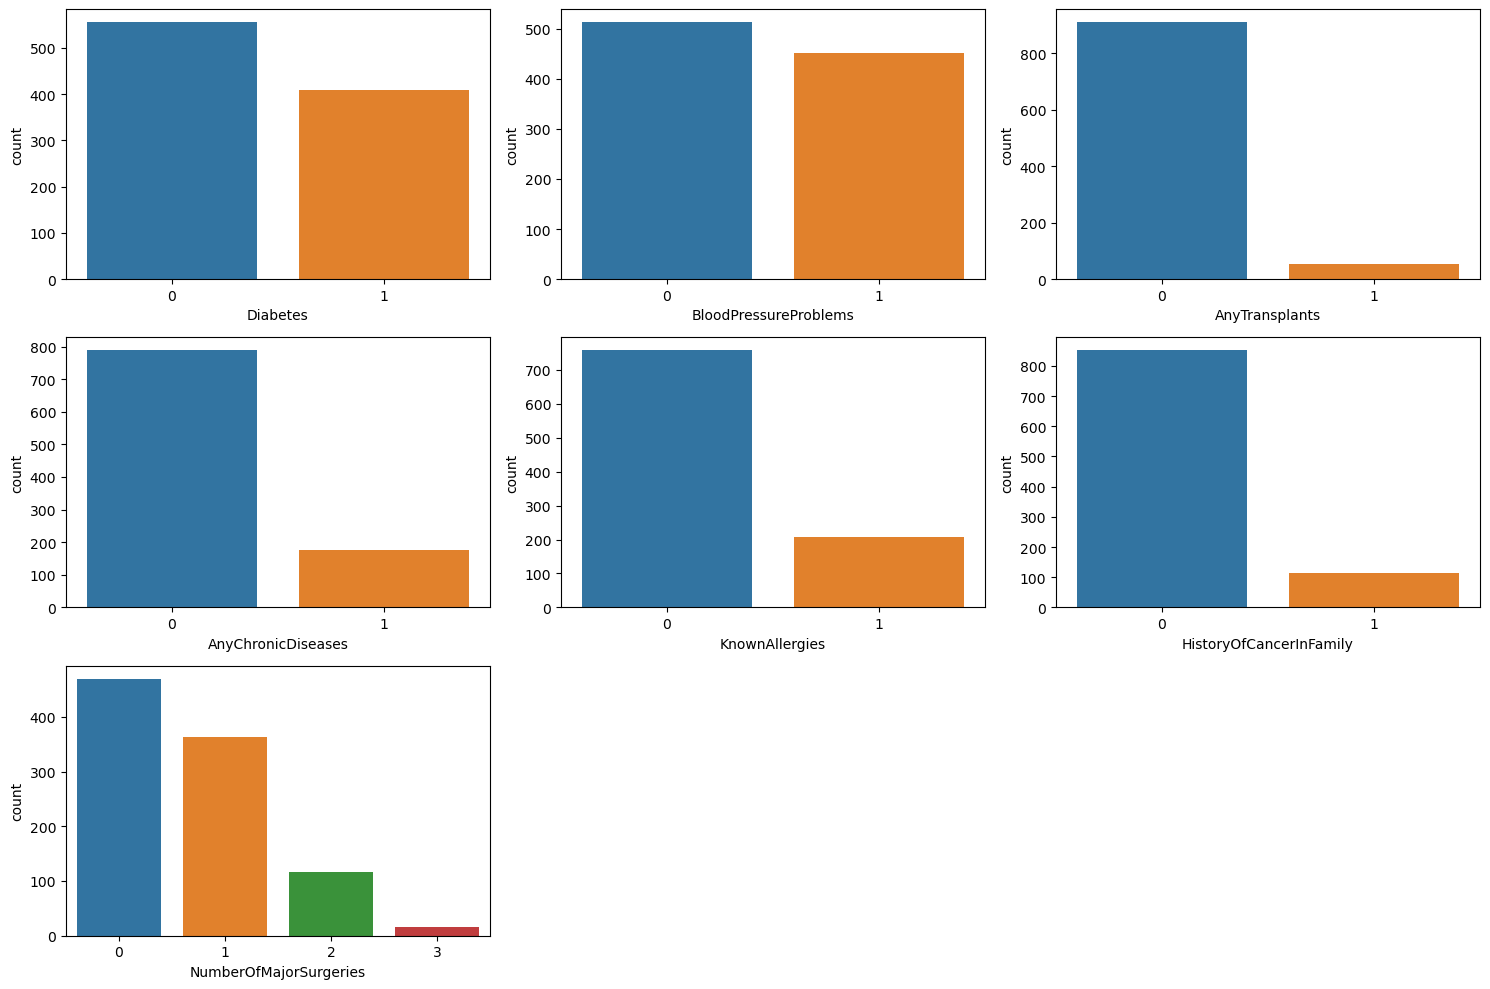

In [20]:
# Count plots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature)
plt.tight_layout()
plt.show()

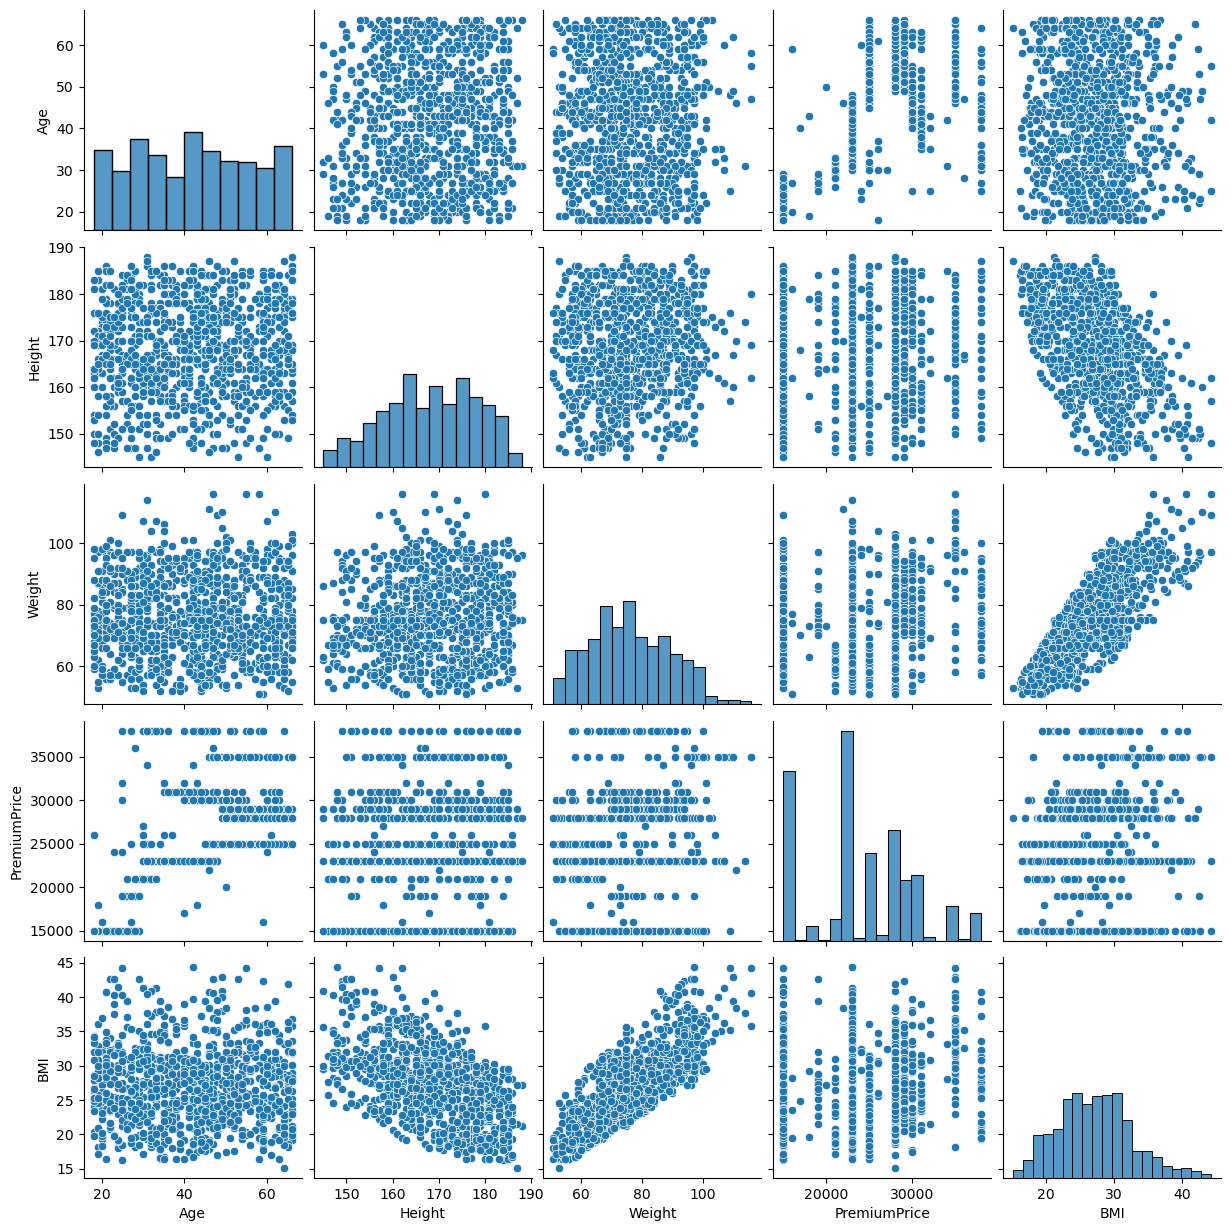

In [21]:
# Pair plot including BMI
sns.pairplot(df[numerical_features + ['BMI']])
plt.show()

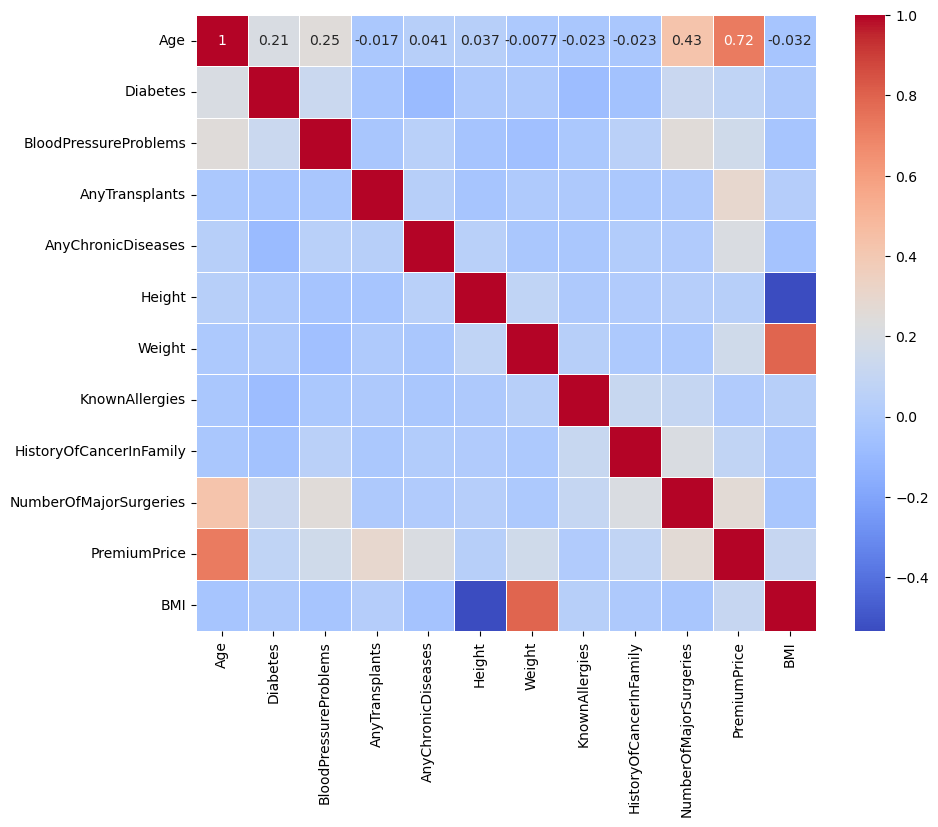

In [22]:
# Correlation matrix excluding categorical 'PremiumCategory'
df_numeric = df.drop(columns=['PremiumCategory'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

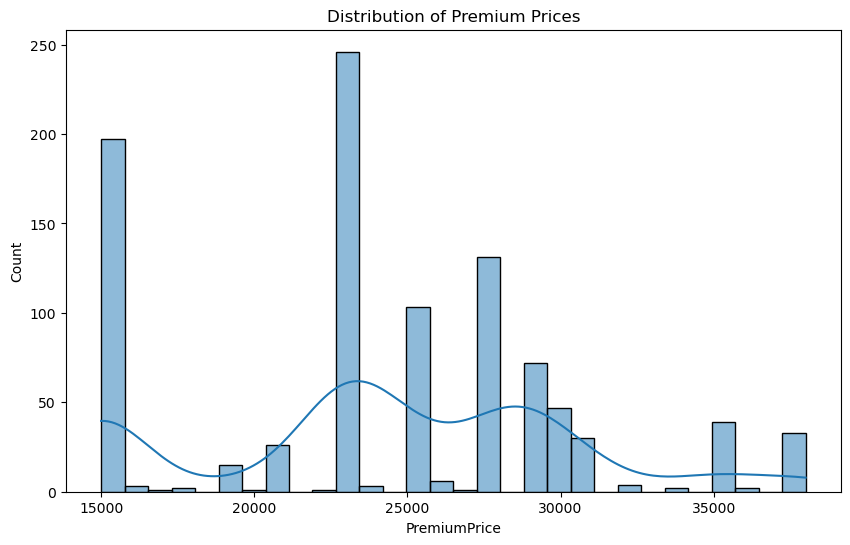

In [23]:
# Distribution of Premium Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['PremiumPrice'], bins=30, kde=True)
plt.title('Distribution of Premium Prices')
plt.show()

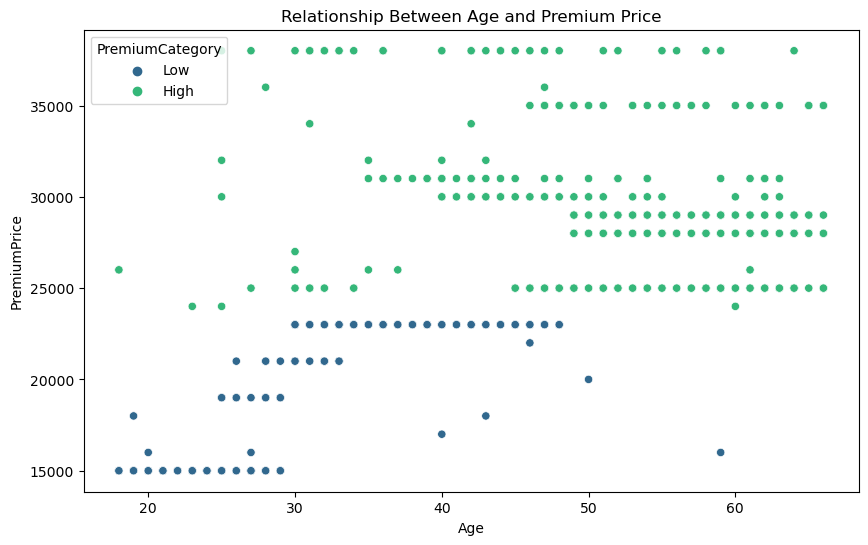

In [24]:
# Relationship between Age and Premium Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PremiumPrice', data=df, hue='PremiumCategory', palette='viridis')
plt.title('Relationship Between Age and Premium Price')
plt.show()

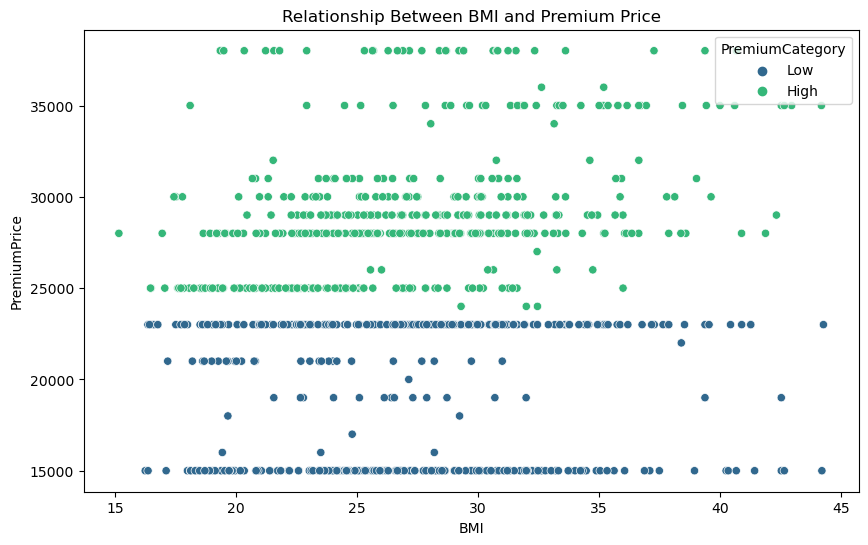

In [25]:
# Correlation between BMI and Premium Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='PremiumPrice', data=df, hue='PremiumCategory', palette='viridis')
plt.title('Relationship Between BMI and Premium Price')
plt.show()